# EDA 

## 1. Import

In [1]:
import pandas as pd
import numpy as np

## 2. Data Load

In [2]:
train = pd.read_csv('/kaggle/input/lg-aimers/train.csv').drop(columns=['ID'])
test = pd.read_csv('/kaggle/input/lg-aimers/test.csv').drop(columns=['ID'])
submission = pd.read_csv('/kaggle/input/lg-aimers/sample_submission.csv')

In [3]:
train.shape, test.shape

((256351, 68), (90067, 67))

In [ ]:
# X = train.drop('임신 성공 여부', axis=1)
# y = train['임신 성공 여부']

## 3. Data View

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 68 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   시술 시기 코드               256351 non-null  object 
 1   시술 당시 나이               256351 non-null  object 
 2   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 3   시술 유형                  256351 non-null  object 
 4   특정 시술 유형               256349 non-null  object 
 5   배란 자극 여부               256351 non-null  int64  
 6   배란 유도 유형               256351 non-null  object 
 7   단일 배아 이식 여부            250060 non-null  float64
 8   착상 전 유전 검사 사용 여부       2718 non-null    float64
 9   착상 전 유전 진단 사용 여부       250060 non-null  float64
 10  남성 주 불임 원인             256351 non-null  int64  
 11  남성 부 불임 원인             256351 non-null  int64  
 12  여성 주 불임 원인             256351 non-null  int64  
 13  여성 부 불임 원인             256351 non-null  int64  
 14  부부 주 불임 원인             256351 non-nu

### target distribution

<Axes: xlabel='임신 성공 여부', ylabel='count'>

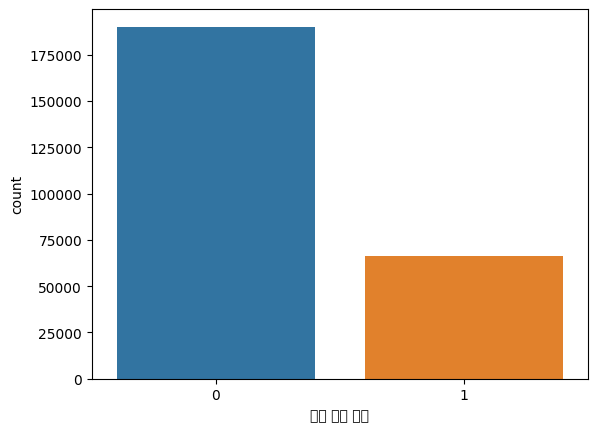

In [5]:
import warnings
import seaborn as sns

warnings.filterwarnings("ignore", category=UserWarning)
sns.countplot(x='임신 성공 여부', data=train)

## feature summary

In [6]:
binary_features = [
    '배란 자극 여부',
    '단일 배아 이식 여부',
    '착상 전 유전 검사 사용 여부',
    '착상 전 유전 진단 사용 여부',
    '남성 주 불임 원인',
    "남성 부 불임 원인",
    "여성 주 불임 원인",
    "여성 부 불임 원인",
    "부부 주 불임 원인",
    "부부 부 불임 원인",
    "불명확 불임 원인",
    "불임 원인 - 난관 질환",
    "불임 원인 - 남성 요인",
    "불임 원인 - 배란 장애",
    "불임 원인 - 여성 요인",
    "불임 원인 - 자궁경부 문제",
    "불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인",
    "불임 원인 - 정자 운동성",
    "불임 원인 - 정자 형태",
    "동결 배아 사용 여부",
    "신선 배아 사용 여부",
    "기증 배아 사용 여부",
    "대리모 여부",
    "PGD 시술 여부",
    "PGS 시술 여부"
]

In [7]:
binary_features_mapping = {
    '배란 자극 여부': 'Stimulation Used',
    '단일 배아 이식 여부': 'Single Embryo Transfer',
    '착상 전 유전 검사 사용 여부': 'PGS Used',
    '착상 전 유전 진단 사용 여부': 'PGD Used',
    '남성 주 불임 원인': 'Male Primary Infertility',
    "남성 부 불임 원인": 'Male Secondary Infertility',
    "여성 주 불임 원인": 'Female Primary Infertility',
    "여성 부 불임 원인": 'Female Secondary Infertility',
    "부부 주 불임 원인": 'Couple Primary Infertility',
    "부부 부 불임 원인": 'Couple Secondary Infertility',
    "불명확 불임 원인": 'Unexplained Infertility',
    "불임 원인 - 난관 질환": 'Cause of Infertility - Tubal Disease',
    "불임 원인 - 남성 요인": 'Cause of Infertility - Male Factor',
    "불임 원인 - 배란 장애": 'Cause of Infertility - Ovulatory Disorder',
    "불임 원인 - 여성 요인": 'Cause of Infertility - Female Factors',
    "불임 원인 - 자궁경부 문제": 'Cause of Infertility - Cervical Factors',
    "불임 원인 - 자궁내막증": 'Cause of Infertility - Endometriosis',
    "불임 원인 - 정자 농도": 'Cause of Infertility - Partner Sperm Concentration',
    "불임 원인 - 정자 면역학적 요인": 'Cause of Infertility - Partner Sperm Immunological Factors',
    "불임 원인 - 정자 운동성": 'Cause of Infertility - Partner Sperm Motility',
    "불임 원인 - 정자 형태": 'Cause of Infertility - Partner Sperm Morphology',
    "동결 배아 사용 여부": 'Frozen Embryo Used',
    "신선 배아 사용 여부": 'Fresh Embryo Used',
    "기증 배아 사용 여부": 'Donor Embryo Used',
    "대리모 여부": 'Surrogate Used',
    "PGD 시술 여부": 'PGD Procedure Used',
    "PGS 시술 여부": 'PGS Procedure Used'
}

In [8]:
binary_features_en = [binary_features_mapping.get(feature, feature) for feature in binary_features]

In [9]:
len(binary_features)

27

In [10]:
ordinal_features = [
    "총 시술 횟수",
    "클리닉 내 총 시술 횟수",
    "IVF 시술 횟수",
    "DI 시술 횟수",
    "총 임신 횟수",
    "IVF 임신 횟수",
    "DI 임신 횟수",
    "총 출산 횟수",
    "IVF 출산 횟수",
    "DI 출산 횟수"
]

In [11]:
ordinal_features_mapping = {
    "총 시술 횟수": "Total Treatment Cycles",
    "클리닉 내 총 시술 횟수": "Total Treatment Cycles in Clinic",
    "IVF 시술 횟수": "Total IVF Cycles",
    "DI 시술 횟수": "Total DI Cycles",
    "총 임신 횟수": "Total Pregnancies",
    "IVF 임신 횟수": "Total IVF Pregnancies",
    "DI 임신 횟수": "Total DI Pregnancies",
    "총 출산 횟수": "Total Live Births",
    "IVF 출산 횟수": "Total Live Births - IVF",
    "DI 출산 횟수": "Total Live Births - DI"
}

In [12]:
ordinal_features_en = [ordinal_features_mapping.get(feature, feature) for feature in ordinal_features]

In [13]:
len(ordinal_features)

10

In [14]:
categorical_features = [
    "시술 시기 코드",
    "시술 당시 나이",
    "특정 시술 유형",
    "배란 유도 유형",
    "배아 생성 주요 이유",
    "난자 출처",
    "정자 출처",
    "난자 기증자 나이",
    "정자 기증자 나이",
]

In [15]:
categorical_features_mapping = {
    "시술 시기 코드": "Treatment Timing Code",
    "시술 당시 나이": "Patient Age at Treatment",
    "특정 시술 유형": "Specific Treatment Type",
    "배란 유도 유형": "Ovulation Induction Type",
    "배아 생성 주요 이유": "Primary Reason for Embryo Creation",
    "난자 출처": "Egg Source",
    "정자 출처": "Sperm Source",
    "난자 기증자 나이": "Egg Donor Age",
    "정자 기증자 나이": "Sperm Donor Age"
}

In [16]:
categorical_features_en = [categorical_features_mapping.get(feature, feature) for feature in categorical_features]

In [17]:
len(categorical_features)

9

In [18]:
numeric_features = [
    "임신 시도 또는 마지막 임신 경과 연수",
    "총 생성 배아 수",
    "미세주입된 난자 수",
    "미세주입에서 생성된 배아 수",
    "이식된 배아 수",
    "미세주입 배아 이식 수",
    "저장된 배아 수",
    "미세주입 후 저장된 배아 수",
    "해동된 배아 수",
    "해동 난자 수",
    "수집된 신선 난자 수",
    "저장된 신선 난자 수",
    "혼합된 난자 수",
    "파트너 정자와 혼합된 난자 수",
    "기증자 정자와 혼합된 난자 수",
    "난자 채취 경과일",
    "난자 해동 경과일",
    "난자 혼합 경과일",
    "배아 이식 경과일",
    "배아 해동 경과일"
]

In [19]:
numeric_features_mapping = {
    "임신 시도 또는 마지막 임신 경과 연수": "Years Since Last Pregnancy Attempt",
    "총 생성 배아 수": "Total Embryos Created",
    "미세주입된 난자 수": "ICSI Eggs Injected",
    "미세주입에서 생성된 배아 수": "ICSI Embryos Created",
    "이식된 배아 수": "Embryos Transferred",
    "미세주입 배아 이식 수": "ICSI Embryos Transferred",
    "저장된 배아 수": "Stored Embryos",
    "미세주입 후 저장된 배아 수": "ICSI Embryos Stored",
    "해동된 배아 수": "Thawed Embryos",
    "해동 난자 수": "Thawed Eggs",
    "수집된 신선 난자 수": "Fresh Eggs Collected",
    "저장된 신선 난자 수": "Stored Fresh Eggs",
    "혼합된 난자 수": "Total Eggs Mixed",
    "파트너 정자와 혼합된 난자 수": "Eggs Mixed with Partner Sperm",
    "기증자 정자와 혼합된 난자 수": "Eggs Mixed with Donor Sperm",
    "난자 채취 경과일": "Days Since Egg Retrieval",
    "난자 해동 경과일": "Days Since Egg Thawing",
    "난자 혼합 경과일": "Days Since Egg Mixing",
    "배아 이식 경과일": "Days Since Embryo Transfer",
    "배아 해동 경과일": "Days Since Embryo Thawing"
}

In [20]:
numeric_features_en = [numeric_features_mapping.get(feature, feature) for feature in numeric_features]

In [21]:
len(numeric_features)

20

In [22]:
target_feature = ["임신 성공 여부"]
target_feature_mapping = {"임신 성공 여부" : "target"}
target_feature_en = [target_feature_mapping.get(feature, feature) for feature in target_feature]

In [23]:
train_en = train 
train_en.rename(columns=binary_features_mapping, inplace=True)
train_en.rename(columns=ordinal_features_mapping, inplace=True)
train_en.rename(columns=categorical_features_mapping, inplace=True)
train_en.rename(columns=numeric_features_mapping, inplace=True)
train_en.rename(columns=target_feature_mapping, inplace=True)

In [24]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, 
                                  size=(12, 18)):
    mpl.rc('font', size=9) 
    plt.figure(figsize=size)                     # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.6, hspace=0.6)  # 서브플롯 좌우/상하 여백 설정

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        # ax축에 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
        sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)

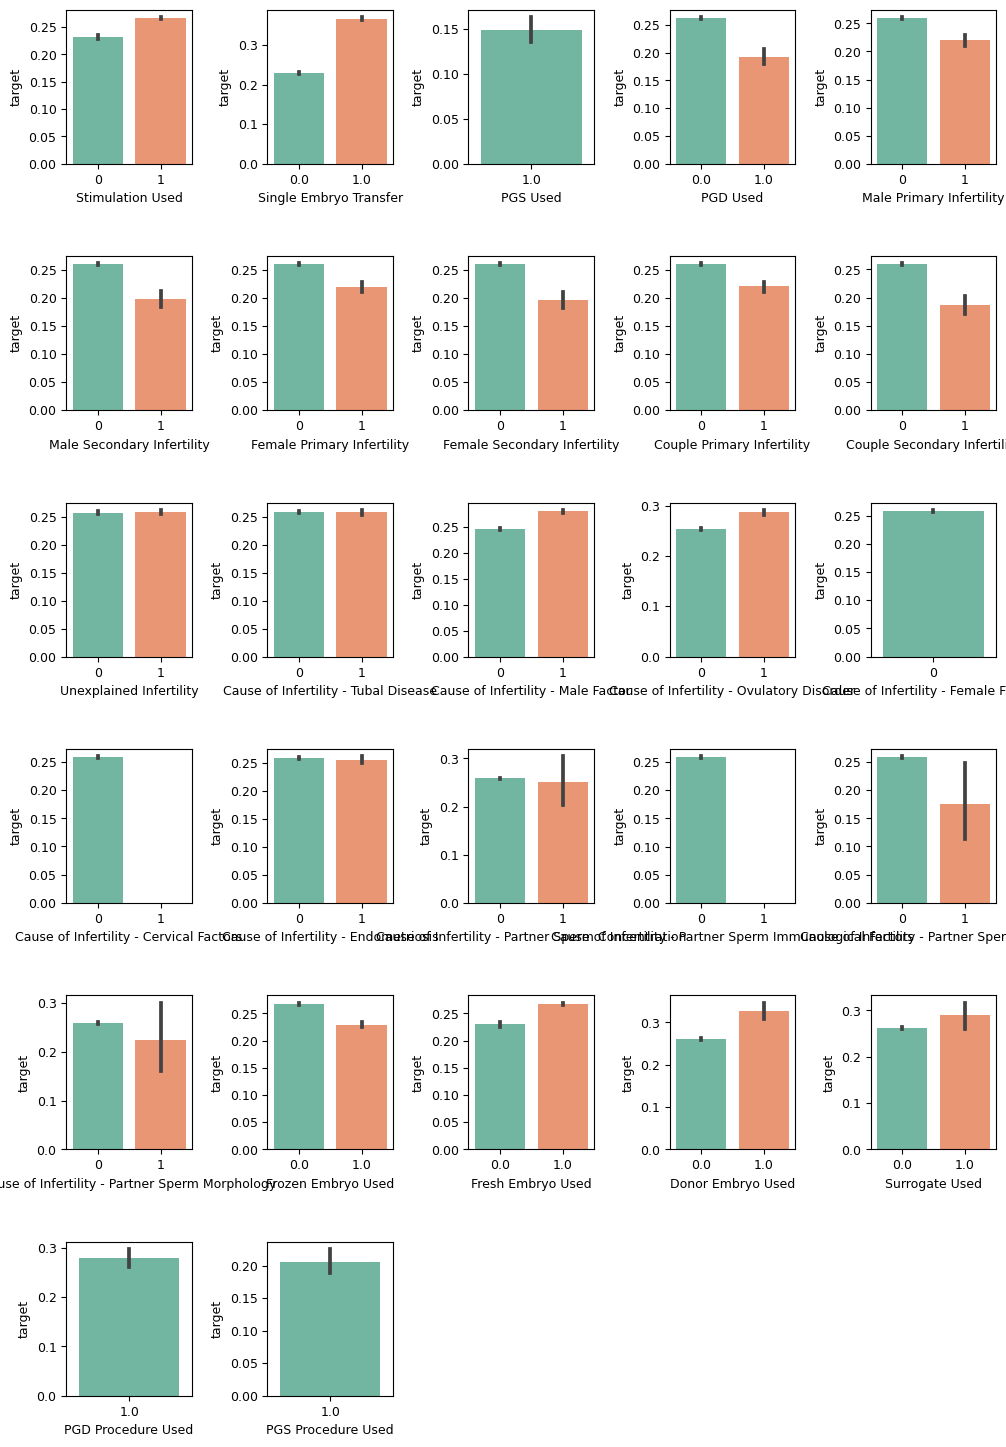

In [26]:
# binary 피처 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
plot_target_ratio_by_features(train_en, binary_features_en, 6, 5) # 6행 5열 배치

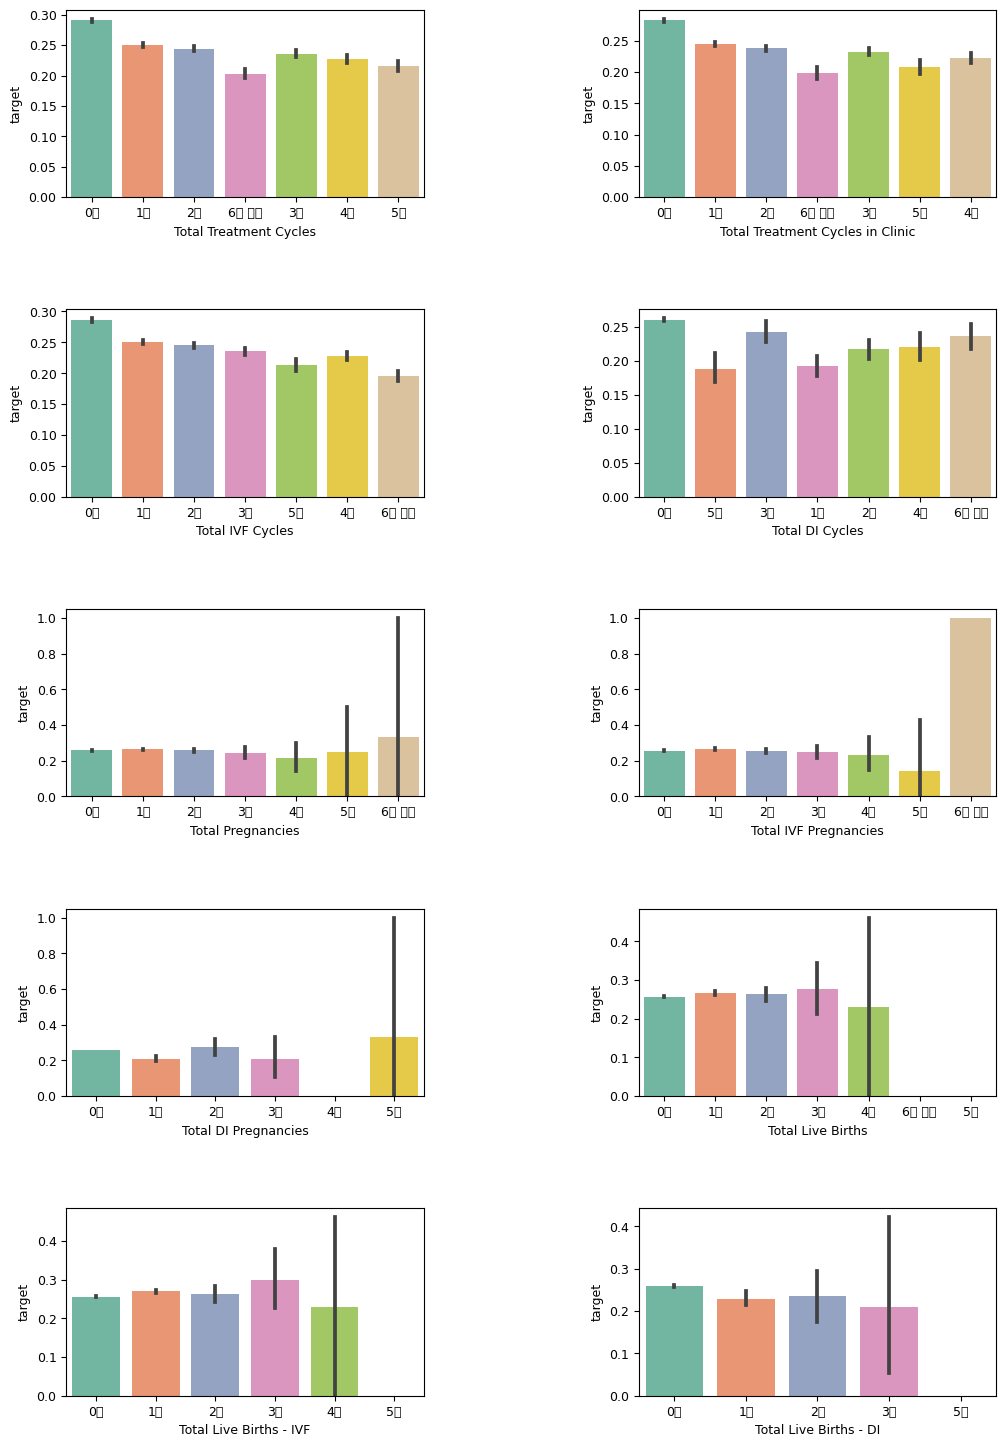

In [27]:
# ordinal 피처 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
plot_target_ratio_by_features(train_en, ordinal_features_en, 5, 2)

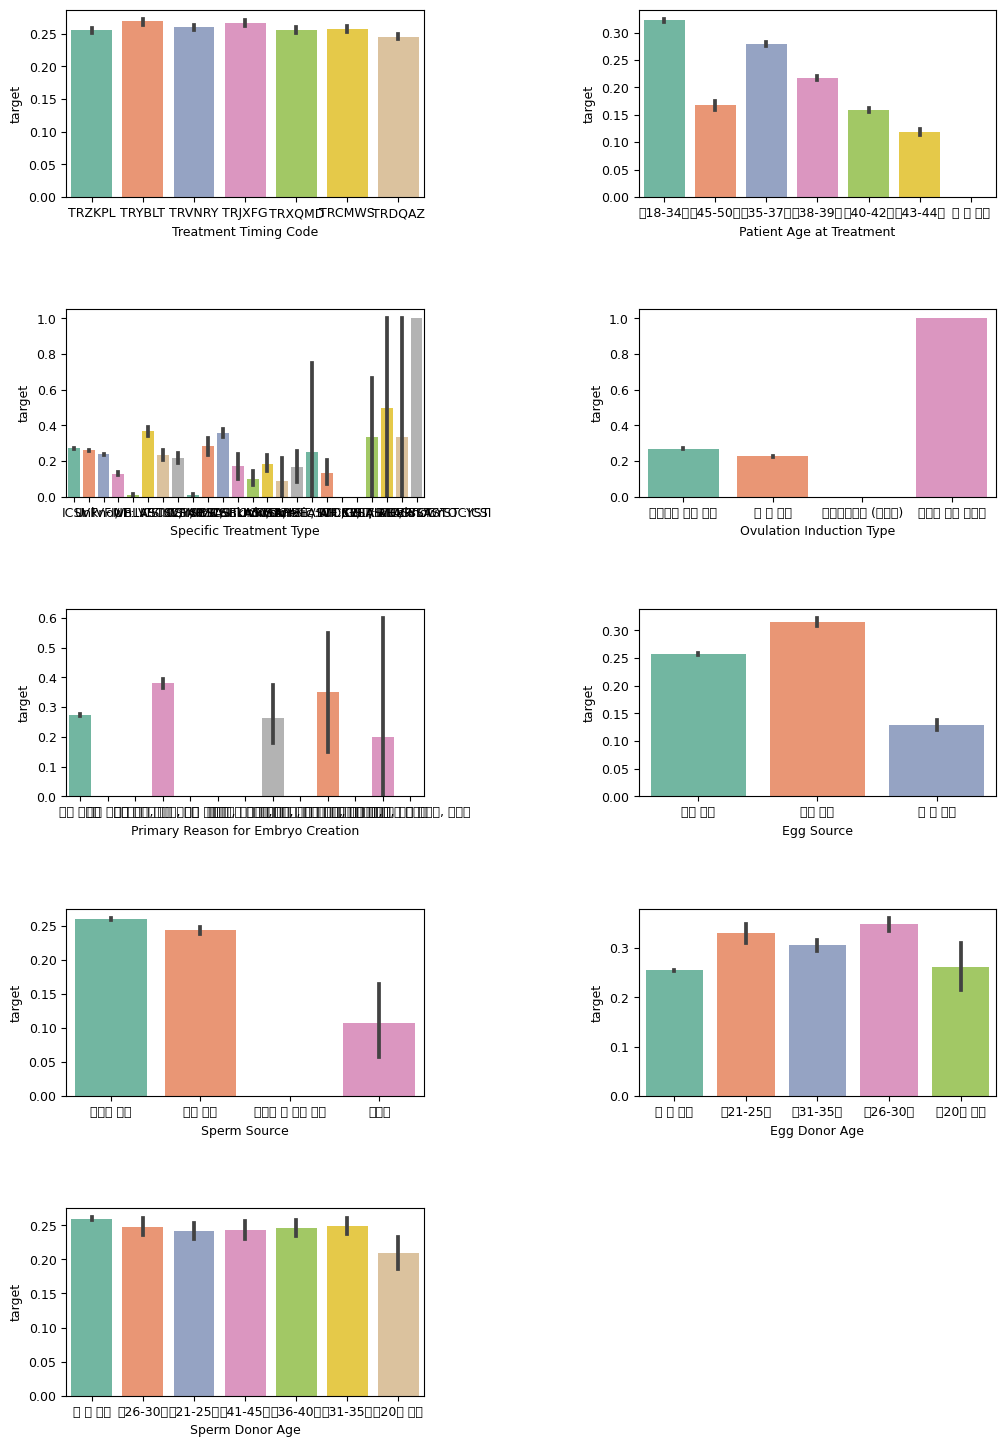

In [28]:
# categorical 피처 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
plot_target_ratio_by_features(train_en, categorical_features_en, 5, 2)

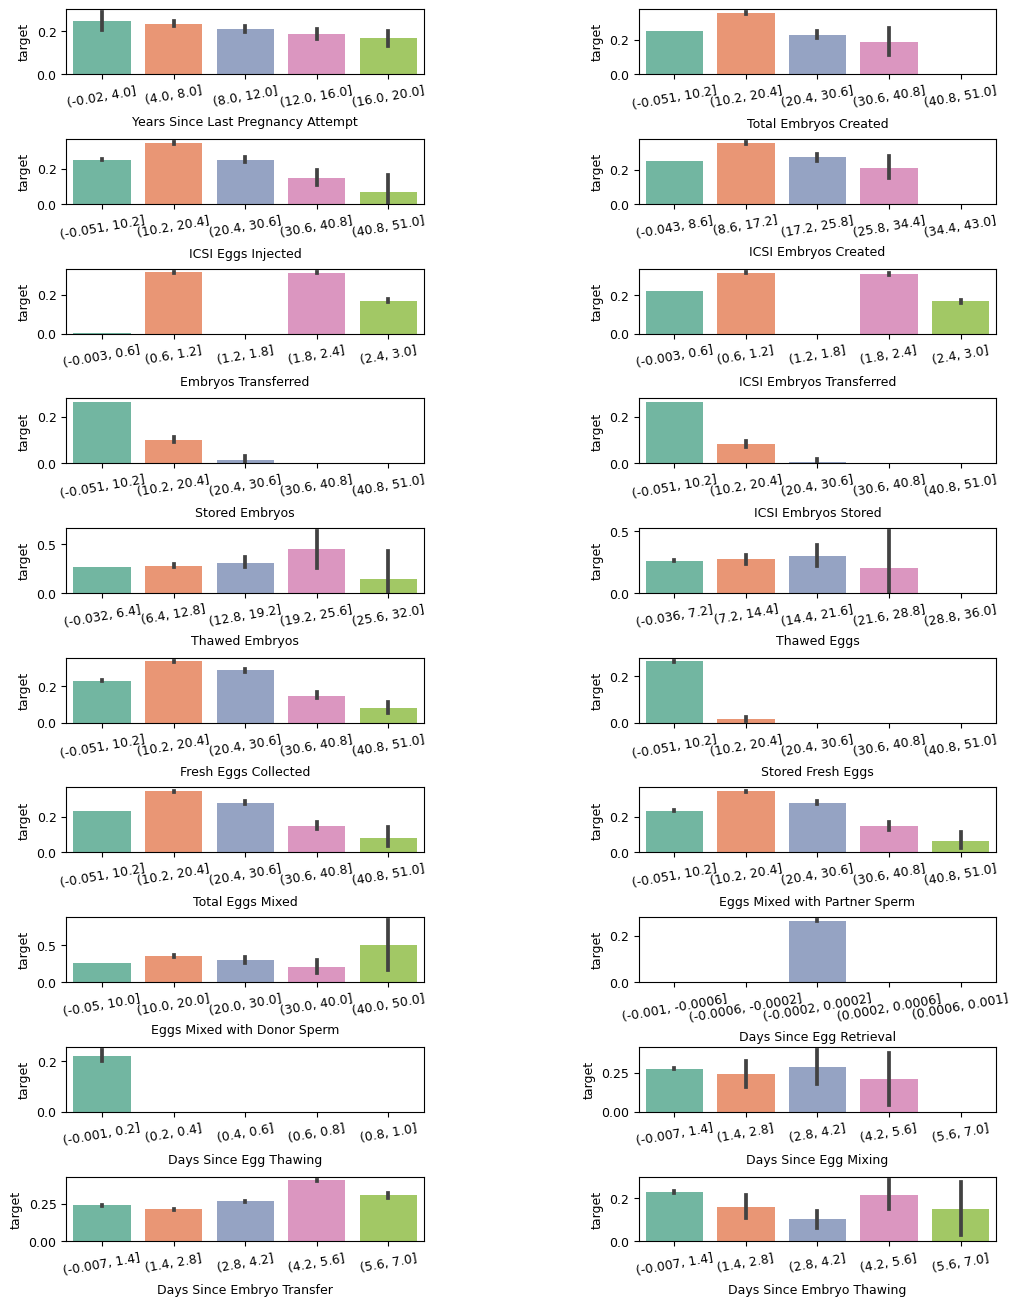

In [35]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

plt.figure(figsize=(12, 16))                # Figure 크기 설정
grid = gridspec.GridSpec(10, 2)              # GridSpec 객체 생성
plt.subplots_adjust(wspace=0.6, hspace=1.0) # 서브플롯 간 여백 설정

for idx, numeric_feature in enumerate(numeric_features_en):
    if not isinstance(train_en[numeric_feature].dtype, pd.CategoricalDtype):
        train_en.loc[:, numeric_feature] = pd.cut(train_en[numeric_feature], 5).astype(str)

    ax = plt.subplot(grid[idx])
    sns.barplot(x=numeric_feature, y='target', data=train_en, palette='Set2', ax=ax)
    ax.tick_params(axis='x', labelrotation=10)